#Laboratorio 8: Mapas y tablas Hash
En este laboratorio vamos a verificar la siguiente afirmación del autor usando la implementación *UnsortedTableMap*.

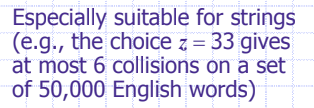

In [1]:
#@title MapBase
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#collections.abc
from collections.abc import MutableMapping

class MapBase(MutableMapping):
  """Our own abstract base class that includes a nonpublic _Item class."""

  #------------------------------- nested _Item class -------------------------------
  class _Item:
    """Lightweight composite to store key-value pairs as map items."""
    __slots__ = '_key', '_value'

    def __init__(self, k, v):
      self._key = k
      self._value = v

    def __eq__(self, other):
      return self._key == other._key   # compare items based on their keys

    def __ne__(self, other):
      return not (self == other)       # opposite of __eq__

    def __lt__(self, other):
      return self._key < other._key    # compare items based on their keys

In [7]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

#@title UnsortedTableMap

class UnsortedTableMap(MapBase):
  """Map implementation using an unordered list."""

  def __init__(self):
    """Create an empty map."""
    self._table = []                              # list of _Item's

  def __getitem__(self, k):
    """Return value associated with key k (raise KeyError if not found)."""
    for item in self._table:
      if k == item._key:
        return item._value
    raise KeyError('Key Error: ' + repr(k))

  def __setitem__(self, k, v):
    """Assign value v to key k, overwriting existing value if present."""
    for item in self._table:
      if k == item._key:                          # Found a match:
        item._value = v                           # reassign value
        return                                    # and quit
    # did not find match for key
    self._table.append(self._Item(k,v))

  def __delitem__(self, k):
    """Remove item associated with key k (raise KeyError if not found)."""
    for j in range(len(self._table)):
      if k == self._table[j]._key:                # Found a match:
        self._table.pop(j)                        # remove item
        return                                    # and quit
    raise KeyError('Key Error: ' + repr(k))

  def __len__(self):
    """Return number of items in the map."""
    return len(self._table)

  def __iter__(self):
    """Generate iteration of the map's keys."""
    for item in self._table:
      yield item._key                             # yield the KEY

Para esto vamos a seguir los siguientes pasos:
1. Usando

```
import requests

url = "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt"
response = requests.get(url)
words_content = response.text

```
van a leer todas las palabras de inglés de la dirección [link](https://raw.githubusercontent.com/dwyl/english-words/master/words.txt).

Cada palabra está separada por un `"\n"`.

2. Con la función `ord` que convierte una letra a un número


```
ord("a")
98
```
escriba una función que convierta una palabra a número usando la acumulación polinomial: de la palabra $a_0a_1\cdots a_n$





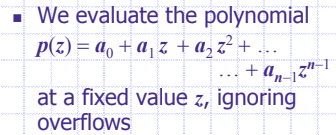

Su función debe recibir dos parámetros:


```
Acumulacion_Polinomial(palabra, z)
```
3. Crea una tabla con las primeras 1000 palabras.
4. Cuenta las colisiones de las primeras 1000 palabras.


In [2]:
import requests

url = "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt"
response = requests.get(url)
words_content = response.text

In [3]:
def Acumulacion_Polinomial(palabra,z):
  palabra_a_numero = []
  for i in palabra:
    palabra_a_numero.append(ord(i))
  funcion_hash = 0
  while len(palabra_a_numero):
      for i in range(len(palabra_a_numero)):
       funcion_hash += palabra_a_numero[-1]*z**i
      palabra_a_numero.pop()
  return funcion_hash

In [4]:
Acumulacion_Polinomial("casa amarilla", 0)


1275

In [9]:
def contar_colision():
  tabla_hash = UnsortedTableMap()
  contador_colisiones = 0
  acumulador_valores = []
  palabras_ingles = words_content.split("\n")
  for i in palabras_ingles[:1000]:
    tabla_hash[i] = Acumulacion_Polinomial(i,5)
  for key,value in tabla_hash.items():
    print(key,"-->",value)
  for i in tabla_hash.values():
    if i in acumulador_valores:
      contador_colisiones += 1
    else :
      acumulador_valores.append(i)
  return contador_colisiones


In [10]:
contar_colision()

2 --> 50
1080 --> 9561
&c --> 632
10-point --> 13992531
10th --> 20157
11-point --> 13992537
12-point --> 13992543
16-point --> 13992567
18-point --> 13992579
1st --> 4335
2,4,5-t --> 2491549
2,4-d --> 87046
20-point --> 13992532
2D --> 458
2nd --> 3810
30-30 --> 47178
3D --> 459
3-D --> 2429
3M --> 513
3rd --> 3835
48-point --> 13992582
4-D --> 2430
4GL --> 2834
4H --> 484
4th --> 3972
5-point --> 2798372
5-T --> 2927
5th --> 3973
6-point --> 2798373
6th --> 3974
7-point --> 2798374
7th --> 3975
8-point --> 2798375
8th --> 3976
9-point --> 2798376
9th --> 3977
a --> 97
a' --> 331
a- --> 367
A&M --> 2680
A&P --> 2773
A. --> 341
A.A.A. --> 239973
A.B. --> 9563
A.B.A. --> 240004
A.C. --> 9594
A.D. --> 9625
A.D.C. --> 241628
A.F. --> 9687
A.F.A.M. --> 6236191
A.G. --> 9718
A.H. --> 9749
A.I. --> 9780
A.I.A. --> 240221
A.I.D. --> 242564
A.L. --> 9873
A.L.P. --> 252029
A.M. --> 9904
A.M.A. --> 240345
A.M.D.G. --> 6121565
A.N. --> 9935
a.p. --> 11021
a.r. --> 11083
A.R.C.S. --> 6355311
A.U. 

5